In [62]:
# loading the important modules

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import thinkstats2
import thinkplot

In [3]:
# Reading the orignal dataset using pandas
sales_data_orig = pd.read_csv("SalesKaggle3.csv")

After loading the data into pandas dataframe, we will look into the various columns to see what values they contain with respect to the range of values and the nature of the columns.

In [4]:
# Gist of the dataset. Showing the sample of 10 rows from the top.

sales_data_orig.head(10)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99
5,8,Historical,214948,0.0,0.0,D,0,0,1783153.0,132.00,2011,33,138.98,13.64
6,9,Historical,484059,0.0,0.0,D,13,1,2314801.0,95.95,2010,33,90.77,46.49
7,10,Historical,146401,0.0,0.0,D,4,1,721111.0,207.80,2011,57,187.90,30.56
8,11,Historical,110568,0.0,0.0,D,11,1,436667.0,119.81,2008,36,63.99,96.92
9,12,Historical,764270,0.0,0.0,D,5,1,6652211.0,49.95,2004,19,53.99,28.99


In [5]:
# Showing the columns in the dataset
sales_data_orig.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [6]:
# Basic data set information
sales_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [7]:
# Summary of the total rows and columns in the dataset
# So there are in total 198917 rows and 14 columns which are show above with the datatype
sales_data_orig.shape

(198917, 14)

The dataset is divided into two sets of data based on the File_Type as mentioned in the description of the data source in kaggle.
historical cases: we have 75996 historical cases which needs to be analyzed.
active cases: we have 122921 active cases which needs to be analyzed.

In [8]:
# Differenciating the historical from the current data in the dataset and getting the record counts
df_hist = sales_data_orig[sales_data_orig['File_Type'] == 'Historical']
df_act = sales_data_orig[sales_data_orig['File_Type'] == 'Active']


print ('Historical dataset Count: ', df_hist.Order.count())
print ('   Current dataset Count: ', df_act.Order.count())

Historical dataset Count:  75996
   Current dataset Count:  122921


As a next logical step we are going to verify the history dataset for any missing or NaN values. As this will be our dataset for doing the EDA.

In [9]:
# As this returns False so that means that we do not have any Null values in the train dataset.
df_hist.isnull().values.any()

False

In [10]:
# As this returns True so that means that we do have Null values in the Test/Current dataset.
# Lets find out what are those
df_act.isnull().values.any()

True

In [11]:
# This shows that the missing values are for the two features SoldFlag and SoldCount
# As expected those will be null to start with.
df_act.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

So lets start working on the historical dataset. This dataset has out of 75996 observations of which 63000 are not sold in the last 6 months and 12,996 got sold.So we would like to see how the sold inventories are behaving as part of our EDA task.

In [13]:
df_hist['SoldFlag'].value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

In [18]:
# Now lets differentiate the historical dataset into 2 subsets 
# df_hist      :  Total Historical inventories
# df_hist_sold :  Sold inventories
# df_hist_unsold: Unsold inventories
#
df_hist_sold = df_hist[df_hist['SoldCount']>0]
df_hist_unsold = df_hist[df_hist['SoldCount']== 0]

sold_cnt = df_hist_sold.SoldFlag.value_counts()
unsold_cnt = df_hist_unsold.SoldFlag.value_counts()

print('Sold Count :', sold_cnt)
print('UnSold Count :', unsold_cnt)


Sold Count : 1.0    12996
Name: SoldFlag, dtype: int64
UnSold Count : 0.0    63000
Name: SoldFlag, dtype: int64


For Categorical columns we plot the histograms using the value_counts() and plot.bar.
1) The first bar plot shows the comparisons between the two types of marketing on the total dataset.
2) The bar plot shows that most of the items were sold less than 5 times of which majority is sold only once.
3) This plot shows that the number of items sold by Release year was most between 2006 and 2012.
4)
5) The last plot is the correlation matrix of the int/float attributes. We found that there we no attributes that was highly correlated to another attribute in this historical dataset.

In [21]:
# Count by Marketing type
df_hist['MarketingType'].value_counts()

S    40877
D    35119
Name: MarketingType, dtype: int64

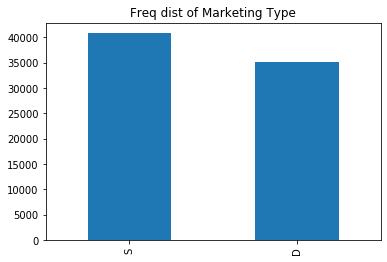

In [89]:
# Bar plot showing it
df_hist['MarketingType'].value_counts().plot.bar(title = 'Freq dist of Marketing Type');

# plt.savefig('fig1.png', dpi=300, bbox_inches='tight')

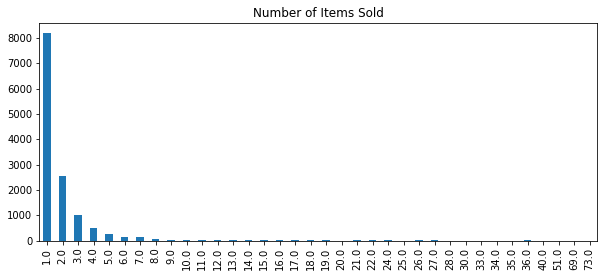

In [90]:
# The below bar plot shows that most of the Items were sold less than 5 counts
df_hist_sold.SoldCount.value_counts().sort_index().plot.bar(title = 'Number of Items Sold',figsize=(10,4));

# plt.savefig('fig2.png', dpi=300, bbox_inches='tight')

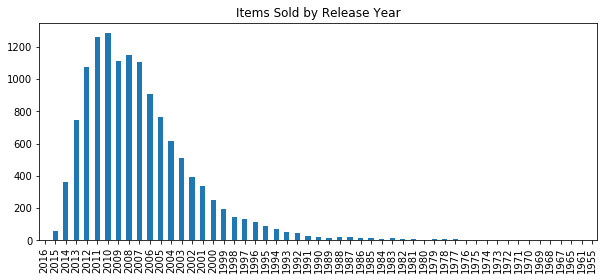

In [91]:
# This plot shows that the number of items sold by Release year was most between 2006 and 2012.
df_hist_sold.ReleaseYear.value_counts().sort_index(ascending=False).plot.bar(title = 'Items Sold by Release Year',figsize=(10,4));

# plt.savefig('fig3.png', dpi=300, bbox_inches='tight')

In [45]:
# Dropping the below 7 columns from the dataset for further analysis as these features are not currently relevant 
# This is required as we are building the next part of our analysis only on the int/float values.

df_hist_sales_data = df_hist.drop(['Order','File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'], axis = 1)
df_hist_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SoldCount       75996 non-null  float64
 1   StrengthFactor  75996 non-null  float64
 2   PriceReg        75996 non-null  float64
 3   ReleaseYear     75996 non-null  int64  
 4   ItemCount       75996 non-null  int64  
 5   LowUserPrice    75996 non-null  float64
 6   LowNetPrice     75996 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 4.6 MB


Correlation matrix compares each attribute in the dataset with each of the other attributes to find out the correlation coefficient. Highly Correlated attributes are helpful in building a model. They would have the same variance within the dataset.

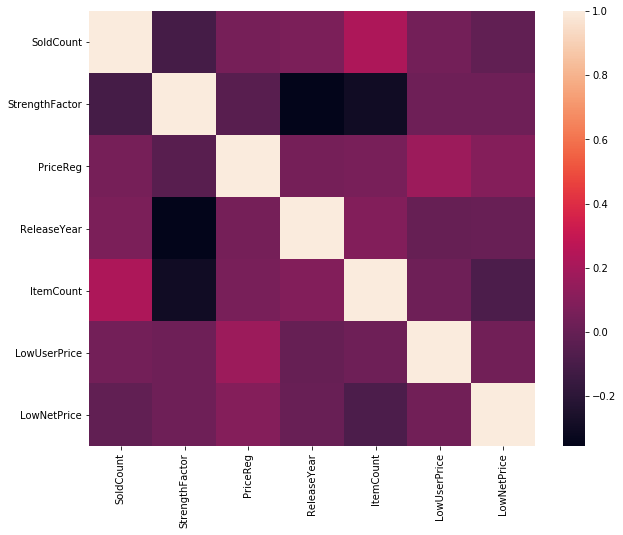

In [92]:
# generating the Correlation matrix
# In this dataset we don't see any attributes to be highly correlated to another.
f, ax = plt.subplots(figsize=(10,8))
corr = df_hist_sales_data.corr()

sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);
# plt.savefig('fig4.png', dpi=300, bbox_inches='tight')

We will be using Box plots below in order to identify the outliers in our attributes.
The Inter Quartile Range (Q3 - Q1) can be used to idntify the outliers.

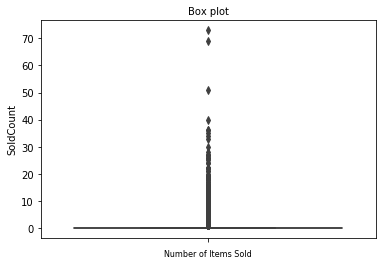

In [60]:
# Outlier Detection using Box plots
sns.boxplot(y=df_hist_sales_data.SoldCount)
plt.title('Box plot', fontsize=10)
plt.xlabel('Number of Items Sold', fontsize=8)
plt.show()

In [61]:
df_hist_sales_data.SoldCount.describe()

count    75996.000000
mean         0.322306
std          1.168615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         73.000000
Name: SoldCount, dtype: float64

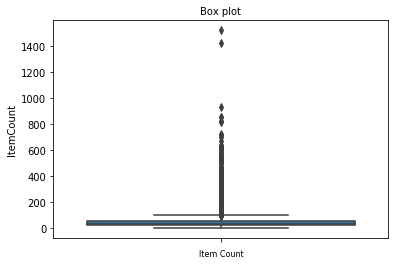

In [56]:
# Outlier Detection using Box plots
sns.boxplot(y=df_hist_sales_data.ItemCount)
plt.title('Box plot', fontsize=10)
plt.xlabel('Item Count', fontsize=8)
plt.show()

In [57]:
df_hist_sales_data.ItemCount.describe()

count    75996.000000
mean        43.843637
std         37.362231
min          0.000000
25%         22.000000
50%         34.000000
75%         53.000000
max       1523.000000
Name: ItemCount, dtype: float64

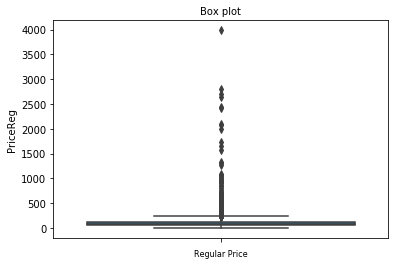

In [58]:
# Outlier Detection using Box plots
sns.boxplot(y=df_hist_sales_data.PriceReg)
plt.title('Box plot', fontsize=10)
plt.xlabel('Regular Price', fontsize=8)
plt.show()

In [59]:
df_hist_sales_data.PriceReg.describe()

count    75996.000000
mean        98.730594
std         78.712358
min          0.000000
25%         49.950000
50%         78.950000
75%        127.000000
max       3986.310000
Name: PriceReg, dtype: float64

In [64]:
df_hist_sales_data.SoldCount.describe()

count    75996.000000
mean         0.322306
std          1.168615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         73.000000
Name: SoldCount, dtype: float64

In [68]:
once = df_hist_sales_data[df_hist_sales_data.SoldCount == 1]
more = df_hist_sales_data[df_hist_sales_data.SoldCount > 1]

In [67]:
once.SoldCount.describe()

count    8179.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: SoldCount, dtype: float64

In [69]:
more.SoldCount.describe()

count    4817.000000
mean        3.386963
std         3.164926
min         2.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        73.000000
Name: SoldCount, dtype: float64

In [70]:
once_pmf = thinkstats2.Pmf(once.PriceReg, label = 'once')
more_pmf = thinkstats2.Pmf(more.PriceReg, label = 'more')

In [71]:
more.PriceReg.describe()

count    4817.000000
mean      117.341528
std        87.066119
min         0.000000
25%        55.750000
50%        99.000000
75%       161.500000
max      1733.670000
Name: PriceReg, dtype: float64

In [72]:
once.PriceReg.describe()

count    8179.000000
mean      110.959275
std        83.539892
min         0.000000
25%        54.635000
50%        91.950000
75%       146.875000
max      2000.000000
Name: PriceReg, dtype: float64

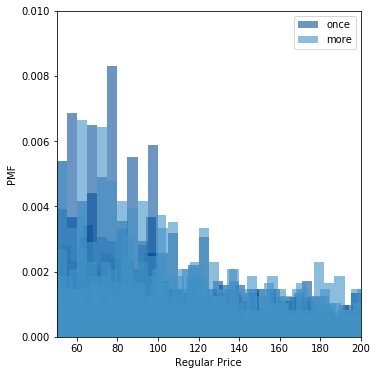

In [95]:
width = 5
axis = [50, 200, 0, .01]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(once_pmf, align='right', width=width)
thinkplot.Hist(more_pmf, align='left', width=width)
thinkplot.Config(xlabel='Regular Price', ylabel='PMF', axis=axis, loc='upper right')

# plt.savefig('fig5.png', dpi=300, bbox_inches='tight')

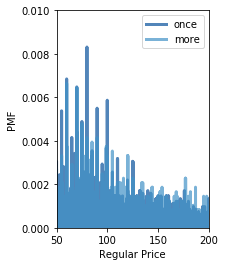

In [81]:
axis = [50, 200, 0, .01]
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([once_pmf,more_pmf])
thinkplot.Config(xlabel='Regular Price', ylabel='PMF', axis=axis)

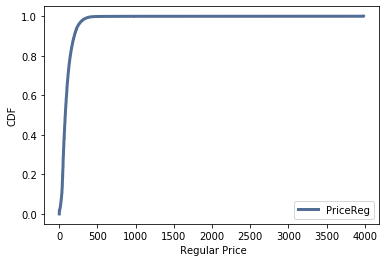

In [99]:
cdf = thinkstats2.Cdf(df_hist_sales_data.PriceReg, label='PriceReg')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel=' Regular Price', ylabel='CDF', loc='lower right')

# plt.savefig('fig6.png', dpi=300, bbox_inches='tight')

In [102]:
print(' Median Price :', cdf.Value(.5))
print(' 10 Percentile:', cdf.Value(.1))
print(' 99 Percentile:', cdf.Value(.90))


 Median Price : 78.95
 10 Percentile: 32.5
 99 Percentile: 195.95


The CDF above shows that the median price is $78 and 10% of the items are less than $32 while 90% of the items are less than $200.

Showing the analytical distribution of the items remaining in the inventory after deducting the sold counts from the historical data

In [115]:
# Adding a new column 'ItemRem' in the history sales data
# Removing the 4 items that had sold more than the Items avaialble

df_hist_sales_data['ItemRem'] = df_hist_sales_data.ItemCount - df_hist_sales_data.SoldCount
df_hist_sales_data = df_hist_sales_data[df_hist_sales_data.ItemRem >=0]
df_hist_sales_data.describe()

,SoldCount,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,ItemRem
count,75992.000000,7.599200e+04,75992.000000,75992.000000,75992.000000,75992.000000,75992.000000,75992.000000
mean,0.321073,1.222471e+06,98.733245,2005.972984,43.845115,56.707676,47.185782,43.524042
std,1.140192,1.540550e+06,78.713243,6.113731,37.362460,104.759788,129.817755,37.116961
min,0.000000,6.800000e+01,0.000000,1935.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.446812e+05,49.950000,2003.000000,22.000000,20.490000,18.740000,22.000000
50%,0.000000,7.160165e+05,78.950000,2007.000000,34.000000,44.030000,36.130000,34.000000
75%,0.000000,1.554108e+06,127.000000,2010.000000,53.000000,79.372500,56.920000,53.000000
max,73.000000,1.666966e+07,3986.310000,2017.000000,1523.000000,14140.210000,19138.790000,1522.000000


Mean, Var 41.70227193382926 766.672442403909
Sigma 27.688850507088752


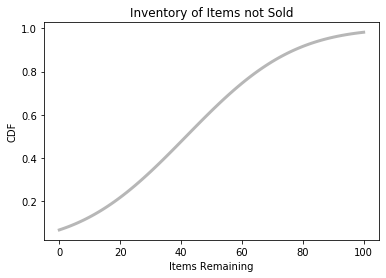

In [166]:
# Generating the inventory from the history file and removing outliers for better fit
items = df_hist_sales_data.ItemRem

mu, var = thinkstats2.TrimmedMeanVar(items, p=0.01)
print('Mean, Var', mu, var)

# plot the analytic model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=100)

thinkplot.Plot(xs, ps, label='model', color ='0.6')
thinkplot.Config(title = 'Inventory of Items not Sold',
                xlabel = 'Items Remaining',
                ylabel = 'CDF')
# plt.savefig('fig7.png', dpi=300, bbox_inches='tight')

Creating 2 scatter plots trying to show the correlation and causation.
1) comparing the two variables 'PriceReg': Regular Price and the 'SoldCount': # of items sold 
2) comparing the other two variables 'LowUserPrice': Low User Price and the 'LowNetPrice': Low Net Price

In [124]:
# lets start with the historical data.
df = sales_data_orig[sales_data_orig['File_Type'] == 'Historical']

In [125]:
# Lets take a random subset of a DataFrame
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace = replace)
    sample = df.loc[indices]
    return sample

In [148]:
# Lets extract the price in '$' and the Sold Count in number from the sample
sample = SampleRows(df, 5000)
price, soldCnt = sample.PriceReg, sample.SoldCount

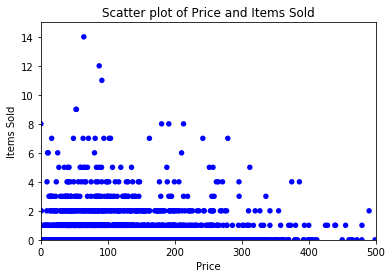

In [167]:
# here is the simple scatter plot
thinkplot.Scatter(price, soldCnt, alpha = 1)
thinkplot.Config(title = 'Scatter plot of Price and Items Sold',
                xlabel = 'Price',
                ylabel = 'Items Sold',
                axis=[0, 500, 0, 15],
                legend = False)
# plt.savefig('fig8.png', dpi=300, bbox_inches='tight')

In [150]:
# Lets extract the two prices from the sample
sample = SampleRows(df, 5000)
userprice, netprice = sample.LowUserPrice, sample.LowNetPrice

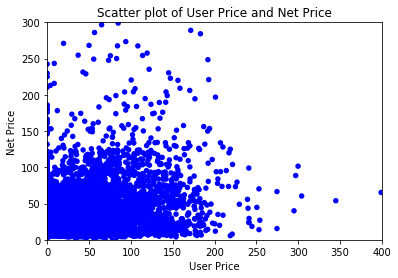

In [168]:
# here is the simple scatter plot
thinkplot.Scatter(userprice, netprice, alpha = 1)
thinkplot.Config(title = 'Scatter plot of User Price and Net Price',
                xlabel = 'User Price',
                ylabel = 'Net Price',
                axis=[0, 400, 0, 300],
                legend = False)
# plt.savefig('fig9.png', dpi=300, bbox_inches='tight')

In [152]:
# using spearman correlation provided by the pandas series
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [153]:
# Calculating the Spearman Correlation for the two sets of variables
SpearmanCorr(price, soldCnt)

0.07274698160337743

In [154]:
# Calculating the Spearman Correlation for the two sets of variables
SpearmanCorr(userprice, netprice)

0.20503117946374924

Covariance is useful for some calculations, but it doesn't mean much by itself. The coefficient of correlation is a standardized version of covariance that is easier to interpret.
Spearman's correlation is more robust, and it can handle non-linear relationships as long as they are monotonic.
In my above two cases the correlation of coeff is higher for the second relationship, although not very significant.
As the relationship is very weak we cannot say anything related to the causation from the correlation.

Hypothesis Testing 

Testing the difference in the mean price for the items sold is less than the mean price of the items not sold. We will test if the effect is statistically significant.
The Null hypothesis is that the distributions for the two groups are the same. One way to model the hypothesis is by permutation; that is we can take values for the mean price of items sold and others and shuffle them.

The hypothesis under test is that price of item sold is less than the price of item not sold, so using test statistic of raw difference between the prices, and the absolute value of the difference. In both the cases, the p-value is significantly small, so the null hypothesis is ignored.

In [169]:

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [172]:
df = sales_data_orig[sales_data_orig['File_Type'] == 'Historical']
# Taking the mean price of items sold and the items not sold
price_sold = df[df.SoldFlag > 0]
price_notsold = df[df.SoldFlag == 0]

data = price_sold.PriceReg.values, price_notsold.PriceReg.values


(array([100.  , 121.95, 120.39, ...,  45.  ,  50.  ,  49.99]),
 array([ 44.99,  24.81,  46.  , ..., 142.75,  50.  ,  46.95]))

In [173]:
# The p-value is , which means it is plausible that the observed difference is just the result of random sampling, 
# and might not be generally true in the population.
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

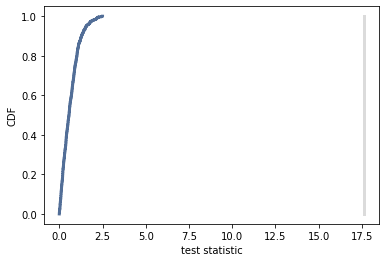

In [174]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [175]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [176]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

Logistic Regression
We are trying to predict the endogenous variable (dependant) variable sold flag using a logistic model. So that the retail firm can decide which products to keep in the inventory and which ones to discard.
We would be modeling this variable using the history dataset df.
1) Initially we are trying to predict the SoldFlag using the PriceReg explanatory variable. As per the below output, the PriceReg is positive which suggests that higher priced items should be mainatined in the inventory. 
But the p-value of 0.000 suggest it is purely due to chance.
2) Now let us build the model with more explanatory variables like, PriceReg, StrengthFactor, ReleaseYear, ItemCount, LowUserPrice, LowNetPrice

In [163]:
import statsmodels.formula.api as smf

model = smf.logit('SoldFlag ~ PriceReg', data = df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.454239
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               SoldFlag   No. Observations:                75996
Model:                          Logit   Df Residuals:                    75994
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Aug 2020   Pseudo R-squ.:                0.007089
Time:                        20:08:48   Log-Likelihood:                -34520.
converged:                       True   LL-Null:                       -34767.
Covariance Type:            nonrobust   LLR p-value:                3.287e-109
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8502      0.016   -114.739      0.000      -1.882      -1.819
PriceReg       0.0026      0.000     21.899      0.000       0.002       0.003
==============================================================================
"""

In [164]:
# Explanatory variables: PriceReg, StrengthFactor, ReleaseYear, ItemCount, LowUserPrice, LowNetPrice
formula = 'SoldFlag ~ PriceReg + StrengthFactor + ReleaseYear + ItemCount + LowUserPrice + LowNetPrice'
model = smf.logit(formula, data = df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424272
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               SoldFlag   No. Observations:                75996
Model:                          Logit   Df Residuals:                    75989
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Aug 2020   Pseudo R-squ.:                 0.07259
Time:                        20:22:52   Log-Likelihood:                -32243.
converged:                       True   LL-Null:                       -34767.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.8969      3.843     -4.397      0.000     -24.429      -9.365
PriceReg           0.0017      0.000     13.013      0.000       0.001       0.002
StrengthFactor -2.791e-07   1.17e-08    -23.848      0.000   -3.02e-07   -2.56e-07
ReleaseYear        0.0074      0.002      3.842      0.000       0.004       0.011
ItemCount          0.0116      0.000     41.262      0.000       0.011       0.012
LowUserPrice       0.0020      0.000     10.921      0.000       0.002       0.002
LowNetPrice       -0.0004      0.000     -2.046      0.041      -0.001   -1.65e-05
==================================================================================
"""

In [165]:
# Explanatory variables: PriceReg, StrengthFactor, ReleaseYear, ItemCount, LowUserPrice, LowNetPrice
formula = 'SoldFlag ~ PriceReg + StrengthFactor + ReleaseYear + ItemCount + LowUserPrice'
model = smf.logit(formula, data = df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424309
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               SoldFlag   No. Observations:                75996
Model:                          Logit   Df Residuals:                    75990
Method:                           MLE   Df Model:                            5
Date:                Fri, 07 Aug 2020   Pseudo R-squ.:                 0.07251
Time:                        20:24:05   Log-Likelihood:                -32246.
converged:                       True   LL-Null:                       -34767.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.6151      3.834     -4.334      0.000     -24.129      -9.101
PriceReg           0.0016      0.000     12.893      0.000       0.001       0.002
StrengthFactor -2.781e-07   1.17e-08    -23.816      0.000   -3.01e-07   -2.55e-07
ReleaseYear        0.0072      0.002      3.774      0.000       0.003       0.011
ItemCount          0.0117      0.000     42.635      0.000       0.011       0.012
LowUserPrice       0.0020      0.000     10.826      0.000       0.002       0.002
==================================================================================
"""